In [1]:
import cv2
import glob
import numpy as np
import os
from scipy import misc
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
def get_hero_percent(img_dir):
    """Finds the percent of images in which hero is present. By tokyo_adam 4-10-17

    Looks through the /data/[train, validation]/masks directory to
    find images (*.png) with blue (hero is always in blue) color in them.

    Args:
        img_dir: directory with labelled images. Typically, path to
                 /masks directory

    Returns:
        percent_hero: percentage of images with hero in them
        total_files: total number of images
        num_blue_pix: a list of number of blue pixels per image

    """
    total_files = 0
    total_hero = 0
    num_blue_pix = []

    os.chdir(img_dir)
    for file in glob.glob("*.png"):
        total_files +=1

        img = cv2.imread(file)
        blue = img[:,:,0]
        num_blue_pix.append(np.count_nonzero(blue))

        if np.any(blue == 255):
            total_hero += 1

    percent_hero = 100. * total_hero / total_files
    
    return percent_hero, total_files, num_blue_pix

In [3]:
def flip_and_save_images(img_dir, extension):
    """Doubles the image dataset by flipping each image. By Mithi Sevilla
    
    Looks through a directory for a given image file extension and flipps
    all the images and saves them with a "flipped" prefix.

    Args:
        img_dir: path to directory with images.
        extension: file extension for the images. Ex: 'png', 'jpeg'

    """
    os.chdir(img_dir)
    files = glob.glob("*." + extension)
    for i, file in enumerate(files):
        # print(i)
        img = misc.imread(file, flatten=False, mode='RGB')
        flipped_img = np.fliplr(img)
        misc.imsave("flipped" + file, flipped_img)

In [4]:
def hero_distribution(input_data, title, num_bins, data_range, color='green'):
    """Plots a histogram of input_data. By @robottrainer
    
    Looks through a directory for a given image file extension and flipps
    all the images and saves them with a "flipped" prefix.

    Args:
        input_data: list or 1d array. list of blue pixel counts
        title: string. title of the plot
        num_bins: int. number of bins in the histogram
        data_range: tuple. minimum and maximum values to include in the plot
        color: string. color of the plot

    """
    # the histogram of the data
    n, bins, patches = plt.hist(input_data, bins=num_bins, range=data_range, facecolor=color, alpha=0.75)

    bins_edges = [(int(x), int(bins[i+1])) for i, x in enumerate(bins[:-1])]
    for binn, count in zip(bins_edges, n):
        print('[{0}, {1}) - {2}'.format(binn[0], binn[1], int(count)))

    plt.xlabel('size bins in pixels')
    plt.ylabel('num images in bin')
    plt.title(title)
    plt.grid(True)

    plt.show()

    print('total images with {0} pixels to {1} pixels = {2}'.format(data_range[0], data_range[1], np.sum(n)))

In [5]:
# my dirs
home = !echo "$HOME"
train_masks = home[0] + "/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/train/masks/"
train_images = home[0] + "/Coursework/RoboND/robond-github/RoboND-DeepLearning-Project/data/train/images/"

In [6]:
# check the percent of images with hero
hero_percent, total_files, num_blues = get_hero_percent(train_masks)

print("{0:.2f}% of images contain the hero".format(hero_percent))
print("total number of images =", total_files)
print("total number of images with hero =", total_files * hero_percent/100)

print("length of blue pixel list =", len(num_blues))
print("{0:.2f}% of files with > 0 blue pixels".format(np.count_nonzero(num_blues)/total_files * 100))

num_blues_normed = [x/(256 * 256) * 100 for x in num_blues]

print('min hero pixels =', min(num_blues))
print('max hero pixels =', max(num_blues))
print('mean hero pixels =', np.mean(num_blues))

37.64% of images contain the hero
total number of images = 4131
total number of images with hero = 1555.0
length of blue pixel list = 4131
37.64% of files with > 0 blue pixels
min hero pixels = 0
max hero pixels = 18990
mean hero pixels = 173.628419269


[0, 400) - 3718
[400, 800) - 20
[800, 1200) - 16
[1200, 1600) - 308
[1600, 2000) - 35
[2000, 2400) - 28
[2400, 2800) - 1
[2800, 3200) - 1
[3200, 3600) - 0
[3600, 4000) - 0
[4000, 4400) - 1
[4400, 4800) - 0
[4800, 5200) - 0
[5200, 5600) - 0
[5600, 6000) - 0
[6000, 6400) - 0
[6400, 6800) - 0
[6800, 7200) - 0
[7200, 7600) - 0
[7600, 8000) - 1
[8000, 8400) - 0
[8400, 8800) - 0
[8800, 9200) - 0
[9200, 9600) - 0
[9600, 10000) - 0
[10000, 10400) - 0
[10400, 10800) - 0
[10800, 11200) - 0
[11200, 11600) - 0
[11600, 12000) - 0
[12000, 12400) - 0
[12400, 12800) - 0
[12800, 13200) - 0
[13200, 13600) - 0
[13600, 14000) - 0
[14000, 14400) - 1
[14400, 14800) - 0
[14800, 15200) - 0
[15200, 15600) - 0
[15600, 16000) - 0
[16000, 16400) - 0
[16400, 16800) - 0
[16800, 17200) - 0
[17200, 17600) - 0
[17600, 18000) - 0
[18000, 18400) - 0
[18400, 18800) - 0
[18800, 19200) - 1
[19200, 19600) - 0
[19600, 20000) - 0


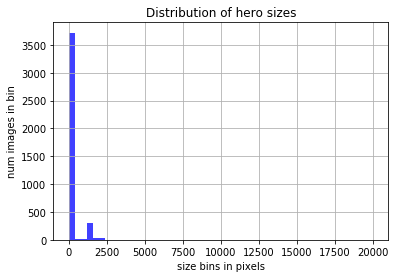

total images with 0 pixels to 20000 pixels = 4131.0


In [7]:
hero_distribution(num_blues, 'Distribution of hero sizes', 50, (0, 20000), 'blue')

[1, 120) - 1014
[120, 240) - 72
[240, 360) - 44
[360, 480) - 20
[480, 600) - 6
[600, 720) - 1
[720, 840) - 7
[840, 960) - 4
[960, 1080) - 3
[1080, 1200) - 7
[1200, 1320) - 11
[1320, 1440) - 144
[1440, 1560) - 141
[1560, 1680) - 26
[1680, 1800) - 17
[1800, 1920) - 2
[1920, 2040) - 3
[2040, 2160) - 13
[2160, 2280) - 14
[2280, 2400) - 0


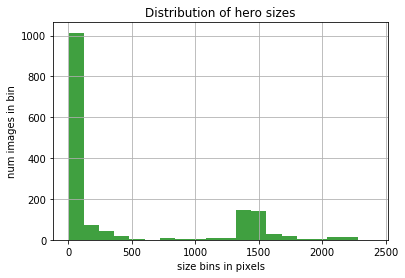

total images with 1 pixels to 2400 pixels = 1549.0


In [8]:
hero_distribution(num_blues, 'Distribution of hero sizes', 20, (1, 2400), 'green')

[1, 50) - 672
[50, 100) - 320
[100, 150) - 41
[150, 200) - 35
[200, 250) - 21
[250, 300) - 18
[300, 350) - 20
[350, 400) - 15
[400, 450) - 4
[450, 500) - 5
[500, 550) - 1
[550, 600) - 4
[600, 650) - 0
[650, 700) - 1
[700, 750) - 2
[750, 800) - 3
[800, 850) - 3
[850, 900) - 0
[900, 950) - 3
[950, 1000) - 0


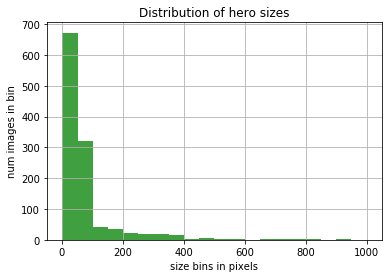

total images with 1 pixels to 1000 pixels = 1168.0


In [9]:
hero_distribution(num_blues, 'Distribution of hero sizes', 20, (1, 1000), 'green')

[1001, 1070) - 2
[1070, 1140) - 4
[1140, 1210) - 5
[1210, 1280) - 3
[1280, 1350) - 15
[1350, 1420) - 87
[1420, 1490) - 136
[1490, 1560) - 54
[1560, 1630) - 17
[1630, 1700) - 12
[1700, 1770) - 9
[1770, 1840) - 5
[1840, 1910) - 2
[1910, 1980) - 2
[1980, 2050) - 1
[2050, 2120) - 2
[2120, 2190) - 20
[2190, 2260) - 5
[2260, 2330) - 0
[2330, 2400) - 0


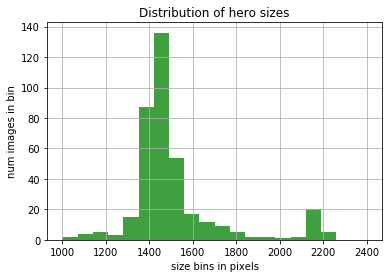

total images with 1001 pixels to 2400 pixels = 381.0


In [10]:
hero_distribution(num_blues, 'Distribution of hero sizes', 20, (1001, 2400), 'green')

[0, 0) - 2576
[0, 0) - 0


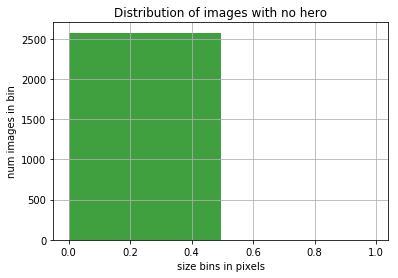

total images with 0.0 pixels to 0.99 pixels = 2576.0


In [11]:
hero_distribution(num_blues, 'Distribution of images with no hero', 2, (0.0, 0.99), 'green')

[1, 20) - 109
[20, 40) - 412
[40, 60) - 311
[60, 80) - 147
[80, 100) - 13
[100, 120) - 22
[120, 140) - 11
[140, 160) - 17
[160, 180) - 13
[180, 200) - 13
[200, 220) - 13
[220, 240) - 5
[240, 260) - 5
[260, 280) - 8
[280, 300) - 8
[300, 320) - 10
[320, 340) - 7
[340, 360) - 6
[360, 380) - 10
[380, 400) - 2


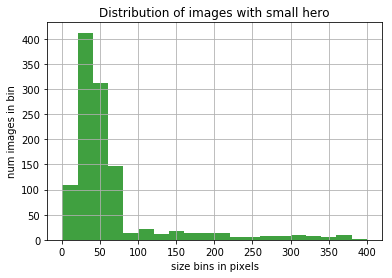

total images with 1 pixels to 400 pixels = 1142.0


In [12]:
hero_distribution(num_blues, 'Distribution of images with small hero', 20, (1, 400), 'green')

[401, 500) - 9
[500, 600) - 5
[600, 700) - 1
[700, 800) - 5
[800, 900) - 3
[900, 1000) - 3
[1000, 1100) - 3
[1100, 1200) - 7
[1200, 1300) - 6
[1300, 1400) - 65
[1400, 1500) - 184
[1500, 1600) - 53
[1600, 1700) - 17
[1700, 1800) - 14
[1800, 1900) - 2
[1900, 2000) - 2
[2000, 2100) - 3
[2100, 2200) - 23
[2200, 2300) - 2
[2300, 2400) - 0


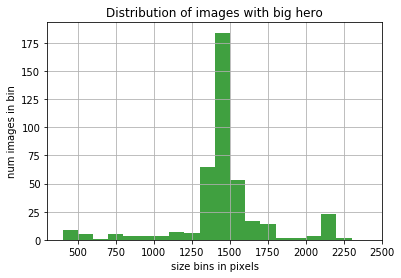

total images with 401 pixels to 2400 pixels = 407.0


In [13]:
hero_distribution(num_blues, 'Distribution of images with big hero', 20, (401, 2400), 'green')

[1, 2) - 13
[2, 4) - 13
[4, 6) - 5
[6, 8) - 13
[8, 10) - 7
[10, 12) - 6
[12, 14) - 15
[14, 16) - 12
[16, 18) - 11
[18, 20) - 14
[20, 22) - 15
[22, 24) - 21
[24, 26) - 41
[26, 28) - 43
[28, 30) - 46
[30, 32) - 56
[32, 34) - 49
[34, 36) - 53
[36, 38) - 56
[38, 40) - 32


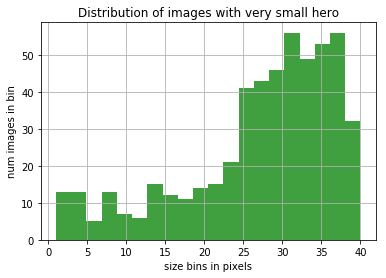

total images with 1 pixels to 40 pixels = 521.0


In [14]:
hero_distribution(num_blues, 'Distribution of images with very small hero', 20, (1, 40), 'green')

[41, 58) - 281
[58, 76) - 158
[76, 94) - 28
[94, 112) - 14
[112, 130) - 17
[130, 148) - 13
[148, 166) - 15
[166, 184) - 9
[184, 202) - 12
[202, 220) - 13
[220, 238) - 5
[238, 256) - 5
[256, 274) - 7
[274, 292) - 6
[292, 310) - 9
[310, 328) - 8
[328, 346) - 3
[346, 364) - 6
[364, 382) - 10
[382, 400) - 2


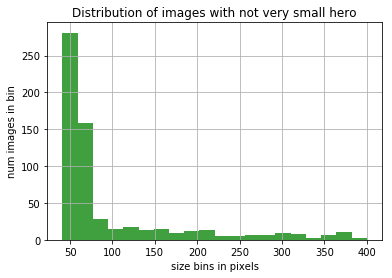

total images with 41 pixels to 400 pixels = 621.0


In [15]:
hero_distribution(num_blues, 'Distribution of images with not very small hero', 20, (41, 400), 'green')